## `Exploratory Data Analysis (EDA) project`
### `Lending Club Case Study`
Lending Club is suferring from Default. It has now decided to find out what features/attributes of their customer (data) influence the Default probability. 
We are to perform an Exploratory Data Analysis to find that. 

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore") 

### `Import Data`

In [3]:
# Import the csv file containing input - Loan data

loan_work = pd.read_csv("loan.csv", encoding ="ISO-8859-1")
loan = loan_work.copy(deep=True)
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### `Drop Unncessary Features`

In [4]:
# Clean Unnecessary Fields

loan = loan.drop([
'acc_now_delinq'
,'acc_open_past_24mths'
,'all_util'
,'annual_inc_joint'
,'application_type'
,'avg_cur_bal'
,'bc_open_to_buy'
,'bc_util'
,'chargeoff_within_12_mths'
,'collection_recovery_fee'
,'collections_12_mths_ex_med'
,'delinq_2yrs'
,'delinq_amnt'
,'desc'
,'dti_joint'
,'earliest_cr_line'
,'home_ownership'
,'id'
,'il_util'
,'initial_list_status'
,'inq_fi'
,'inq_last_12m'
,'max_bal_bc'
,'member_id'
,'mo_sin_old_il_acct'
,'mo_sin_old_rev_tl_op'
,'mo_sin_rcnt_rev_tl_op'
,'mo_sin_rcnt_tl'
,'mort_acc'
,'mths_since_last_delinq'
,'mths_since_last_major_derog'
,'mths_since_last_record'
,'mths_since_rcnt_il'
,'mths_since_recent_bc'
,'mths_since_recent_bc_dlq'
,'mths_since_recent_inq'
,'mths_since_recent_revol_delinq'
,'num_accts_ever_120_pd'
,'num_actv_bc_tl'
,'num_actv_rev_tl'
,'num_bc_sats'
,'num_bc_tl'
,'num_il_tl'
,'num_op_rev_tl'
,'num_rev_accts'
,'num_rev_tl_bal_gt_0'
,'num_sats'
,'num_tl_120dpd_2m'
,'num_tl_30dpd'
,'num_tl_90g_dpd_24m'
,'num_tl_op_past_12m'
,'open_acc_6m'
,'open_il_12m'
,'open_il_24m'
,'open_il_6m'
,'open_rv_12m'
,'open_rv_24m'
,'out_prncp'
,'out_prncp_inv'
,'pct_tl_nvr_dlq'
,'percent_bc_gt_75'
,'policy_code'
,'pymnt_plan'
,'recoveries'
,'tax_liens'
,'title'
,'tot_coll_amt'
,'tot_cur_bal'
,'tot_hi_cred_lim'
,'total_bal_ex_mort'
,'total_bal_il'
,'total_bc_limit'
,'total_cu_tl'
,'next_pymnt_d'
,'total_il_high_credit_limit'
,'total_pymnt'
,'total_pymnt_inv'
,'total_rec_int'
,'total_rec_late_fee'
,'total_rec_prncp'
,'verification_status_joint'
,'total_rev_hi_lim'
,'last_pymnt_amnt'
,'last_credit_pull_d'
,'url'], axis=1)
loan

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,addr_state,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_pymnt_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,AZ,27.65,1,3,0,13648,83.70%,9,Jan-15,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,GA,1.00,5,3,0,1687,9.40%,4,Apr-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,IL,8.72,2,2,0,2956,98.50%,10,Jun-14,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,CA,20.00,1,10,0,5598,21%,37,Jan-15,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,OR,17.94,0,15,0,27783,53.90%,38,May-16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,...,CO,11.33,0,13,0,7274,13.10%,40,Jul-10,NaN
39713,8500,8500,875.0,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,...,NC,6.40,1,6,0,8847,26.90%,9,Jul-10,NaN
39714,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,NaN,< 1 year,...,MA,2.30,0,11,0,9698,19.40%,20,Apr-08,NaN
39715,5000,5000,650.0,36 months,7.43%,155.38,A,A2,NaN,< 1 year,...,MD,3.72,0,17,0,85607,0.70%,26,Jan-08,NaN


### `Transform Text label to Numeric`

In [5]:
# Create new column "Defaulted" with Value 1 if Loan Status is Charged Off, otherwise 0  

loan['defaulted'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [6]:
loan['defaulted'][0:10]

0    0
1    1
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    1
Name: defaulted, dtype: int64

### `Statistics of the Data`

In [7]:
# Get a Statisctical picture on the Numerical Data

loan.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39020.000000,39717.000000
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.869200,9.294408,0.055065,13382.528086,22.088828,0.043260,0.141677
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,1.070219,4.400282,0.237200,15885.016641,11.401709,0.204324,0.348723
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,8.000000,44.000000,4.000000,149588.000000,90.000000,2.000000,1.000000


In [8]:
loan.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'last_pymnt_d', 'pub_rec_bankruptcies', 'defaulted'],
      dtype='object')

In [9]:
# Get a glimpse of the type of individual fields

loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  annual_inc            39717 non-null  float64
 11  verification_status   39717 non-null  object 
 12  issue_d               39717 non-null  object 
 13  loan_status           39717 non-null  object 
 14  purpose               39717 non-null  object 
 15  zip_code           

## `Univariate Analysis`

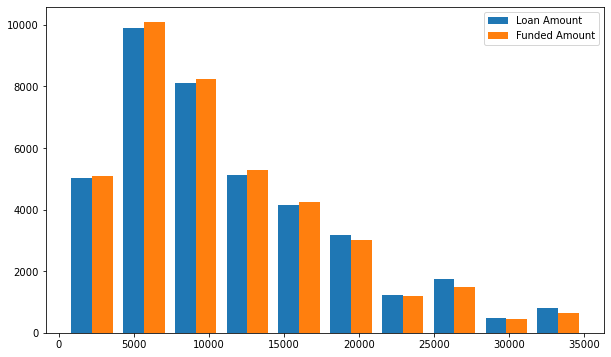

In [10]:
# Check distribution of Loan amounts and Funded Amounts

ax = plt.subplots(figsize=(10, 6))
plt.hist([loan.loan_amnt, loan.funded_amnt], label=['Loan Amount', 'Funded Amount'], bins=10)
plt.legend()

<AxesSubplot:xlabel='loan_amnt'>

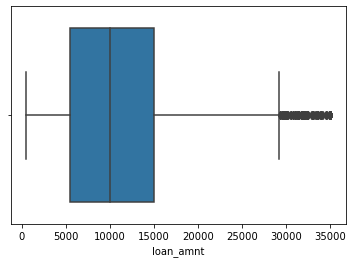

In [11]:
# Check the Distribution of Annual Incomes of Loan Takers

sns.boxplot(loan.loan_amnt)

(array([5033., 9891., 8108., 5121., 4155., 3166., 1228., 1733.,  489.,
         793.]),
 array([  500.,  3950.,  7400., 10850., 14300., 17750., 21200., 24650.,
        28100., 31550., 35000.]),
 <BarContainer object of 10 artists>)

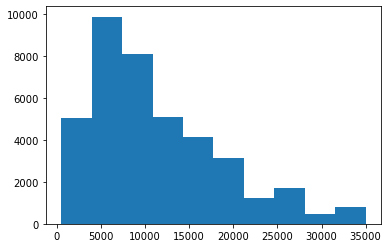

In [12]:
# Distribution with a Histogram

plt.hist(loan.loan_amnt)

In [13]:
print("25, 50, 75, 100 Quartiles of Annual Income:", loan.quantile(q=0.25).annual_inc, loan.quantile(q=0.50).annual_inc, loan.quantile(q=0.75).annual_inc, loan.quantile(q=1).annual_inc)
print("Median of Annual Income: ", loan.annual_inc.median())

25, 50, 75, 100 Quartiles of Annual Income: 40404.0 59000.0 82300.0 6000000.0
Median of Annual Income:  59000.0


<AxesSubplot:xlabel='annual_inc'>

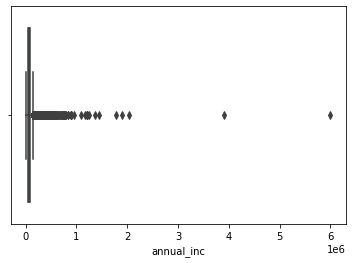

In [14]:
# Distribution with a Histogram

sns.boxplot(loan.annual_inc)

In [15]:
# Extract records with top 99% of Annual Income as max and plot again (this is remove ouliers)

total = int(round(loan.annual_inc.count()*99/100))
loan_temp = pd.DataFrame({'defaulted': loan.defaulted, 'annual_inc': loan.annual_inc})
loan_temp = loan_temp.sort_values('annual_inc')
loan_temp = loan_temp.head(total)
loan_temp

,defaulted,annual_inc
35501,0,4000.0
29283,1,4080.0
30726,0,4200.0
37709,0,4200.0
36639,0,4800.0
...,...,...
3475,0,234000.0
33036,0,234000.0
37048,0,234600.0
29878,0,234996.0


Text(0, 0.5, 'Annual Income')

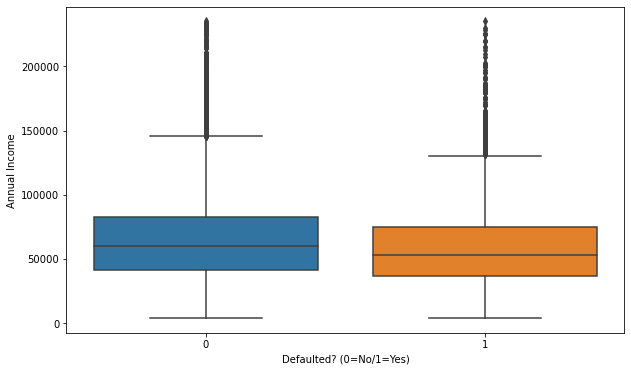

In [16]:
# Boxplot with Annual Income
ax= plt.subplots(figsize=(10, 6))
ax = sns.boxplot(x="defaulted", y="annual_inc", data=loan_temp)
ax.set_xlabel('Defaulted? (0=No/1=Yes)') 
ax.set_ylabel('Annual Income')

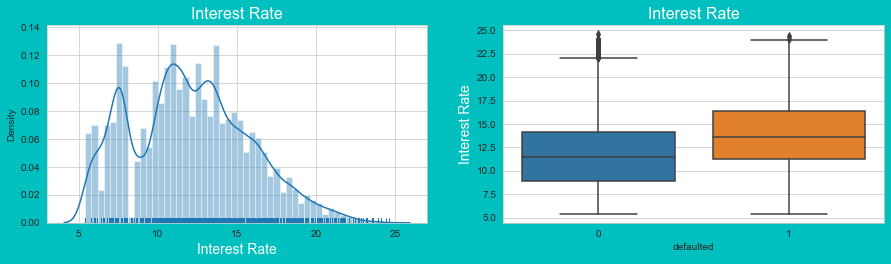

In [17]:
# Univariate Analysis on Intrest Rate-Quantitative Variables

# Create a Numberic field with the numeric value from intrest rate
loan['int_rate_num'] = loan['int_rate'].str.rstrip('%')
loan['int_rate_num'] = pd.to_numeric(loan["int_rate_num"], downcast="float")

plt.figure(figsize=(15,8),facecolor='c')
sns.set_style("whitegrid")

# subplot 1
plt.subplot(2, 2, 1)
ax = sns.distplot(loan['int_rate_num'],rug = True)
ax.set_title('Interest Rate',fontsize=16,color='w')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')

# subplot 2
plt.subplot(2, 2, 2)
ax = sns.boxplot(x="defaulted", y="int_rate_num", data=loan)
ax.set_title('Interest Rate',fontsize=16,color='w')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

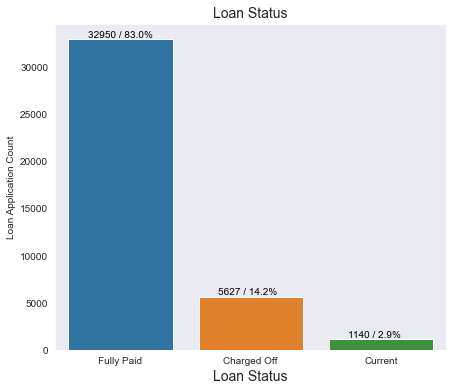

In [18]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(7,6))
sns.set_style("dark")
ax = sns.countplot(x="loan_status",data=loan)
ax.set_title('Loan Status',fontsize=14)
ax.set_xlabel('Loan Status',fontsize=14)
ax.set_ylabel('Loan Application Count')      

# To show count of values above bars
s = loan['loan_status'].value_counts()
tot = s.sum()
for i, v in s.reset_index().iterrows():
    txt = str(v.loan_status) + " / " + str(round(v.loan_status/tot*100, 1)) + '%'
    ax.text(i - 0.25, v.loan_status + 200, txt, color='k')

# Observations :
# Below plot shows that close to 14% loans were charged off out of total loan issued.

In [19]:
s

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## `Multi-variate Analysis`

### Analyse Feature Correlations

In [20]:
# Find Correlations 
cor = loan.corr()

In [21]:
cor

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,pub_rec_bankruptcies,defaulted,int_rate_num
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,0.009229,0.177168,-0.051236,0.317597,0.256442,-0.037180,0.048217,0.309415
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,0.009259,0.175530,-0.052169,0.310392,0.250589,-0.038502,0.045544,0.312619
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.005712,0.163027,-0.053214,0.290797,0.242854,-0.042746,0.026621,0.306657
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,0.009722,0.172812,-0.046532,0.312679,0.230824,-0.034103,0.022589,0.282703
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.033908,0.158200,-0.018689,0.279961,0.235771,-0.016801,-0.041662,0.053185
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,0.001405,0.288045,-0.004621,0.228743,0.229881,0.005691,0.041701,0.111162
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,1.000000,0.091713,0.024802,-0.022381,0.111499,0.016346,0.071717,0.133013
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.091713,1.000000,0.000172,0.288964,0.686635,0.005930,-0.010742,0.010395
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.024802,0.000172,1.000000,-0.061413,-0.023901,0.847305,0.050880,0.097208
revol_bal,0.317597,0.310392,0.290797,0.312679,0.279961,0.228743,-0.022381,0.288964,-0.061413,1.000000,0.313602,-0.049406,0.003369,0.097100


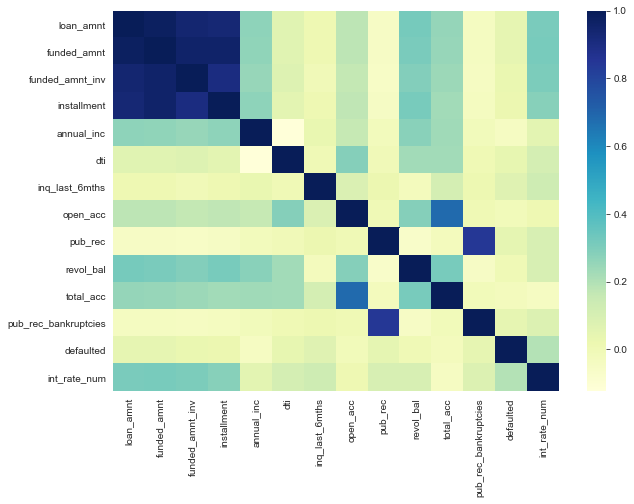

In [22]:
# Examine co-relations between numeric fields

f, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(cor, cmap="YlGnBu")
plt.show()

# Observations:
# 1. There are obvious correlations between the three loan amounts. 
# 2. There are strong correlation between pub_rec and pub_rec_bankruptcies fields

In [23]:
# Find out the number of Null values in invididual columns in the data

loan.isna().sum()

loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
purpose                    0
zip_code                   0
addr_state                 0
dti                        0
inq_last_6mths             0
open_acc                   0
pub_rec                    0
revol_bal                  0
revol_util                50
total_acc                  0
last_pymnt_d              71
pub_rec_bankruptcies     697
defaulted                  0
int_rate_num               0
dtype: int64

### Find out %ages of Null Values

In [24]:
a = (loan.isnull().sum() / loan.shape[0]) * 100
b = a[a>0.05]
b = pd.DataFrame(b,columns=['Percentage of null values'])
b.sort_values(by=['Percentage of null values'], ascending=False)

,Percentage of null values
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
revol_util,0.125891


### Percentage of total Defaults

In [25]:
defaulted = loan[loan['defaulted'] == 1]['defaulted'].count()
total_cnt = loan.defaulted.count()
perc = round(defaulted/total_cnt*100, 2)
print("Total Count", total_cnt)
print("Defaulted", defaulted)
print(f"Percentage {perc}%")

Total Count 39717
Defaulted 5627
Percentage 14.17%


In [26]:
# Is there any significant difference between Requested Loan Amount and Funded/Disbursed Amount - 
# calculated in percentages

print(round(((loan.loan_amnt-loan.funded_amnt)/loan.loan_amnt*100).sort_values(ascending=False), 2))

23556    89.88
23296    89.75
23288    88.93
23416    86.75
23337    84.75
         ...  
26265     0.00
26264     0.00
26263     0.00
26262     0.00
0         0.00
Length: 39717, dtype: float64


In [27]:
# Find out Companywise Default ratio for companies occurring > 20 and highest ratio of Default 
# to find if there is any correlation to companies

loan.emp_title = loan.emp_title.str.upper()
employers = loan.groupby(['emp_title'])['defaulted'].count()
employers = employers.reset_index().sort_values('defaulted', ascending=False)
emp_defaults = loan.groupby(['emp_title'])['defaulted'].sum()
emp_defaults = emp_defaults.reset_index().sort_values('defaulted', ascending=False)
employers.rename(columns = {'defaulted': "Totals"}, inplace=True)
employers
employers_f = pd.merge(employers, emp_defaults, left_on='emp_title', right_on='emp_title')
employers_f['Default_Ratio'] = round(employers_f.defaulted/employers_f.Totals, 4)
employers_f = employers_f.sort_values('Default_Ratio', ascending=False)
employers_f[employers_f.Totals > 20]

,emp_title,Totals,defaulted,Default_Ratio
8,UPS,63,17,0.2698
47,WAL-MART,24,6,0.2500
2,WALMART,81,20,0.2469
37,RETIRED,33,8,0.2424
58,INTERNAL REVENUE SERVICE,21,5,0.2381
27,UNITED STATES POSTAL SERVICE,38,9,0.2368
54,US BANK,22,5,0.2273
19,US POSTAL SERVICE,45,10,0.2222
30,SELF-EMPLOYED,36,8,0.2222
50,SPRINT,23,5,0.2174


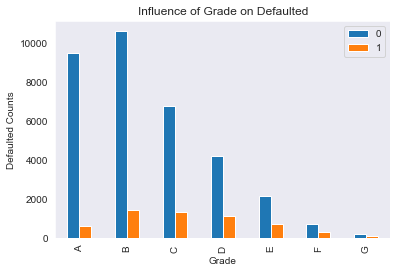

In [28]:
# Plot Delaulted Counts based on grades

pd.crosstab(loan.grade,loan.defaulted).plot(kind='bar')
plt.title('Influence of Grade on Defaulted')
plt.xlabel('Grade')
plt.ylabel('Defaulted Counts')
plt.legend()

In [29]:
pd.crosstab(loan.grade,loan.defaulted)

defaulted,0,1
grade,,
A,9483,602
B,10595,1425
C,6751,1347
D,4189,1118
E,2127,715
F,730,319
G,215,101


## `Feature Transformations`

### Analyse Influence of 'dti' on Default by using new Binning

In [30]:
# Apply Binning on dti ratio ['0-8%', '8-16%', '16-24%', '24%+'']

loan['dtit'] = 0
loan['dti'] = loan['dti'].astype(int)
def bindti(dtip): 
    if dtip >= 0 and dtip < 8:
        return '0-8%'
    elif dtip >= 8 and dtip < 16:
        return '8-16%'
    elif dtip >= 16 and dtip < 24:
        return '16-24%'
    elif dtip >= 22:
        return '24%+'

loan['dtit'] = loan.dti.apply(bindti) 
loan['dtit']

0          24%+
1          0-8%
2         8-16%
3        16-24%
4        16-24%
          ...  
39712     8-16%
39713      0-8%
39714      0-8%
39715      0-8%
39716     8-16%
Name: dtit, Length: 39717, dtype: object

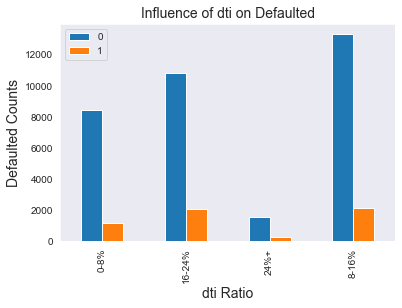

In [31]:
# Correlation between dti ratio and Defaulted after Binning 

%matplotlib inline
pd.crosstab(loan.dtit,loan.defaulted).plot(kind='bar')
plt.title('Influence of dti on Defaulted', fontsize=14)
plt.xlabel('dti Ratio', fontsize=14)
plt.ylabel('Defaulted Counts', fontsize=14)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.legend()

### Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

In [32]:
purpose_vs_loan = loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

# Observations:
# small Business applicants have high chnaces of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


In [33]:
loan.groupby(['purpose', 'loan_status']).loan_status.count().unstack()

loan_status,Charged Off,Current,Fully Paid
purpose,,,
car,160.0,50.0,1339.0
credit_card,542.0,103.0,4485.0
debt_consolidation,2767.0,586.0,15288.0
educational,56.0,NaN,269.0
home_improvement,347.0,101.0,2528.0
house,59.0,14.0,308.0
major_purchase,222.0,37.0,1928.0
medical,106.0,12.0,575.0
moving,92.0,7.0,484.0


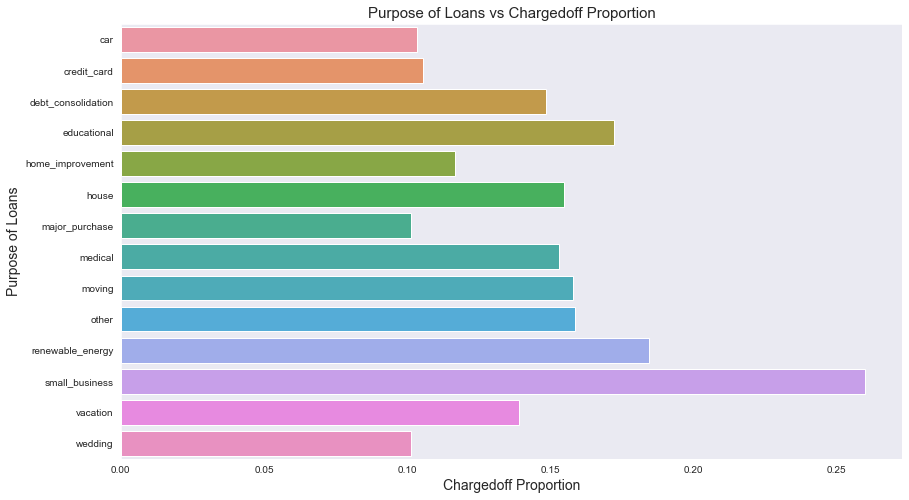

In [34]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.
# pairs of continuous variables.

fig, ax1 = plt.subplots(figsize=(14, 8))
ax1.set_title('Purpose of Loans vs Chargedoff Proportion',fontsize=15)
ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_ylabel('Purpose of Loans',fontsize=14)
ax1.set_xlabel('Chargedoff Proportion',fontsize=14)
plt.show()

# Observations:
# small Business applicants have high chances of getting charged off.
# renewable_energy where chanrged off proportion is better as compare to other categories.

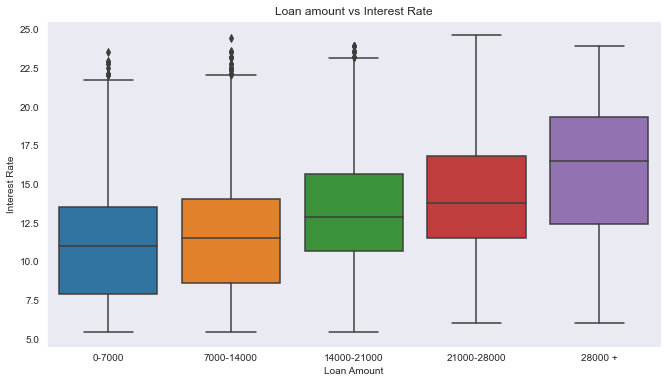

In [35]:
# Understand relationship between Loan Amount vs Interest Rate

# Create a loan amount category field with various brackets

loan['loan_amnt_cats'] = pd.cut(loan['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], 
                                labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

plt.figure(figsize=(11,6))
ax = sns.boxplot(y='int_rate_num', x='loan_amnt_cats', data =loan)
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

# Observations:
# It is clear that intrest rate is increasing with loan amount increase.
# probably when loan amount is more it is taken for longer loan term, we saw earlier that longer the loan term more the
# interest rate.

In [36]:
list(zip(loan['loan_amnt_cats'], loan['defaulted']))

[('0-7000', 0),
 ('0-7000', 1),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('0-7000', 1),
 ('0-7000', 1),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('7000-14000', 1),
 ('0-7000', 0),
 ('7000-14000', 1),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('14000-21000', 0),
 ('14000-21000', 1),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('0-7000', 1),
 ('14000-21000', 0),
 ('14000-21000', 1),
 ('0-7000', 1),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('0-7000', 0),
 ('28000 +', 0),
 ('7000-14000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('14000-21000', 0),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('0-7000', 0),
 ('7000-14000', 0),
 ('0-7000', 1),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('7000-14000', 0),
 ('14000-21000', 1),
 ('21000-28000', 0),
 ('0-7000', 0),
 ('7000-14000', 1),
 ('7000-14000', 0),
